描述

Python strip() 方法用于移除字符串头尾指定的字符（默认为空格）。

语法

strip()方法语法：
str.strip([chars]);


参数
chars -- 移除字符串头尾指定的字符。
返回值
返回移除字符串头尾指定的字符生成的新字符串。


实例

以下实例展示了strip()函数的使用方法：
```
#!/usr/bin/python

str = "0000000this is string example....wow!!!0000000";
print str.strip( '0' );
```
以上实例输出结果如下：

`this is string example....wow!!!`

而split()则是把每行的元素变为一个list.

In [8]:
fr = open('testSet.txt')
dataMat = [] ; labelMat = []
for line in fr.readlines()[0:5]:
    print "line is: ", line
    lineArr = line.strip().split()
    print "lineArr is: ", lineArr
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    labelMat.append(int(lineArr[2]))
    print ''
print dataMat
print labelMat

line is:  -0.017612	14.053064	0

lineArr is:  ['-0.017612', '14.053064', '0']

line is:  -1.395634	4.662541	1

lineArr is:  ['-1.395634', '4.662541', '1']

line is:  -0.752157	6.538620	0

lineArr is:  ['-0.752157', '6.538620', '0']

line is:  -1.322371	7.152853	0

lineArr is:  ['-1.322371', '7.152853', '0']

line is:  0.423363	11.054677	0

lineArr is:  ['0.423363', '11.054677', '0']

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677]]
[0, 1, 0, 0, 0]


In [22]:
from numpy import *

fr = open('testSet.txt')
dataMat = [] ; labelMat = []
for line in fr.readlines()[0:5]:
    lineArr = line.strip().split()
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    labelMat.append(int(lineArr[2]))
dataMatrix = mat(dataMat)
labelMatrix = mat(labelMat)
print dataMatrix
print dataMatrix.transpose()
print labelMatrix
print labelMatrix.transpose()



[[  1.        -0.017612  14.053064]
 [  1.        -1.395634   4.662541]
 [  1.        -0.752157   6.53862 ]
 [  1.        -1.322371   7.152853]
 [  1.         0.423363  11.054677]]
[[  1.         1.         1.         1.         1.      ]
 [ -0.017612  -1.395634  -0.752157  -1.322371   0.423363]
 [ 14.053064   4.662541   6.53862    7.152853  11.054677]]
[[0 1 0 0 0]]
[[0]
 [1]
 [0]
 [0]
 [0]]


In [27]:
# this part is about gradAscent method

from numpy import *

# def sigmoid(inX):
#     return 1.0/(1+exp(-inX))

# fr = open('testSet.txt')
# dataMat = [] ; labelMat = []
# for line in fr.readlines()[0:5]:
#     lineArr = line.strip().split()
#     dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
#     labelMat.append(int(lineArr[2]))
# dataMatrix = mat(dataMat)
# labelMatrix = mat(labelMat)

m, n = shape(dataMatrix)
alpha = 0.001
maxCycles = 5
weights = ones((n, 1))
for k in range(maxCycles):
    print k
    # calculate the prediction
    h = sigmoid(dataMatrix * weights)
    print "h is :", h 
    # get the error between the prediction and the actual value
    error = labelMat - h
    # why use ()
    print "the error is: ", error
    # gradient ascent
    weights = weights + alpha * dataMatrix.transpose() * error
    print "the weights is : " , weights

0
h is : [[ 0.9999997 ]
 [ 0.98616889]
 [ 0.99887232]
 [ 0.99892083]
 [ 0.99999619]]
the error is:  [[ -9.99999705e-01   2.95247368e-07  -9.99999705e-01  -9.99999705e-01
   -9.99999705e-01]
 [ -9.86168887e-01   1.38311131e-02  -9.86168887e-01  -9.86168887e-01
   -9.86168887e-01]
 [ -9.98872318e-01   1.12768173e-03  -9.98872318e-01  -9.98872318e-01
   -9.98872318e-01]
 [ -9.98920829e-01   1.07917140e-03  -9.98920829e-01  -9.98920829e-01
   -9.98920829e-01]
 [ -9.99996191e-01   3.80938115e-06  -9.99996191e-01  -9.99996191e-01
   -9.99996191e-01]]
the weights is :  [[ 0.99501604  1.00001604  0.99501604  0.99501604  0.99501604]
 [ 1.00304283  0.99997842  1.00304283  1.00304283  1.00304283]
 [ 0.95661787  1.00007963  0.95661787  0.95661787  0.95661787]]
1
h is : [[ 0.99999945  0.99999971  0.99999945  0.99999945  0.99999945]
 [ 0.98296671  0.98617458  0.98296671  0.98296671  0.98296671]
 [ 0.9984921   0.99887294  0.9984921   0.9984921   0.9984921 ]
 [ 0.99851547  0.99892149  0.99851547  0.99

# 下面测试一下写好的logRegres

前面的几位回答都没有解决getA()是什么的问题，碰到同样的问题，解释如下：
matrix.getA()
Return self as an ndarray object.
Equivalent to np.asarray(self).
Parameters: None 
Returns: ret : ndarrayself as an ndarray 
也就是说矩阵通过这个getA()这个方法可以将自身返回成一个n维数组对象
为什么要这样做呢？
因为plotBestFit()函数中有计算散点x,y坐标的部分，其中计算y的时候用到了weights，如果weights是矩阵的话，weights[1]就是[0.48007329]（注意这里有中括号！），就不是一个数了，最终你会发现y的计算结果的len()只有1，而x的len()则是60，所以诸位明白了吧~

In [49]:
import logRegres_test
reload (logRegres_test)
dataArr, labelMat = logRegres_test.loadDataSet()
weights = logRegres_test.gradAscent(dataArr, labelMat)
print type(weights)
print weights
print weights.getA()[1]
weights.getA()
# 用getA()把weights这个matrix类型变为array
# 但是要注意，这里的weights是有两个[],用weights.getA()[1][0]才能返回数字

<class 'numpy.matrixlib.defmatrix.matrix'>
[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]
[ 0.48007329]


array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

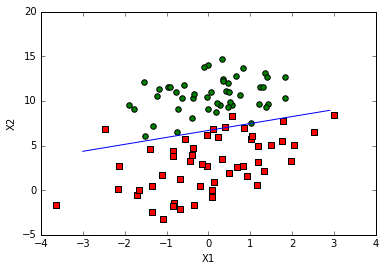

In [50]:
reload (logRegres_test)
%matplotlib inline  

logRegres_test.plotBestFit_matrix(weights)
#plt.close()


<type 'numpy.ndarray'>
weights is :
[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]
<type 'list'>
<type 'numpy.ndarray'>
dataArr[:10] is :
[[  1.        -0.017612  14.053064]
 [  1.        -1.395634   4.662541]
 [  1.        -0.752157   6.53862 ]
 [  1.        -1.322371   7.152853]
 [  1.         0.423363  11.054677]
 [  1.         0.406704   7.067335]
 [  1.         0.667394  12.741452]
 [  1.        -2.46015    6.866805]
 [  1.         0.569411   9.548755]
 [  1.        -0.026632  10.427743]]
dataArr[1, 1] is -1.395634.
dataArr[5, 1] is 0.406704.
dataArr[7, 1] is -2.46015.
[-1.395634, 0.40670400000000001, -2.4601500000000001, 0.85043299999999999, 1.1768130000000001, -0.56660600000000005, 0.93163499999999999, -0.024205000000000001, -0.036452999999999999, -0.19694900000000001]
53
[ 4.35102773  4.42885454  4.50668136  4.58450817  4.66233498  4.7401618
  4.81798861  4.89581542  4.97364223  5.05146905  5.12929586  5.20712267
  5.28494949  5.3627763   5.44060311  5.51842993  5.59625674  5.67

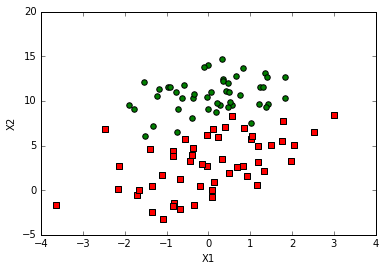

In [31]:
import matplotlib.pyplot as plt
from numpy import *

wei = logRegres_test.gradAscent(dataArr, labelMat)
weights = wei.getA()
print type(weights)
print "weights is :"
print weights
dataMat, labelMat = logRegres_test.loadDataSet()
print type(dataMat)
dataArr = array(dataMat)
print type(dataArr)
print "dataArr[:10] is :\n", dataArr[:10]
n = shape(dataArr)[0]
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []
for i in range(n):
    if int(labelMat[i]) == 1:        
        xcord1.append(dataArr[i, 1])
        if i < 10:
            print "dataArr[%s, 1] is %s." % (i , dataArr[i, 1])
        ycord1.append(dataArr[i, 2])
    else:
        xcord2.append(dataArr[i, 1])
        ycord2.append(dataArr[i, 2])  
formatted_xcord1 = ["%.6f" % member for member in xcord1]
print xcord1[:10]
print len(xcord1)

fig = plt.figure()
ax = fig.add_subplot(111)
# 关于fig.add_subplot(111)， http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
ax.scatter(xcord1, ycord1, s=30, c = 'red', marker = 's')
# scatter 是用来画散点图的，只是把点描出来而已
# 而用来划线的是下面的ax.plot(x, y)
'''
x, y	グラフに出力するデータ
s	サイズ (デフォルト値: 20)
c	色、または、連続した色の値
marker	マーカーの形 (デフォルト値: ‘o’= 円)
'''
ax.scatter(xcord2, ycord2, s=30, c = 'green')
x = arange(-3.0, 3.0, 0.1)
#print x
y = (-weights[0] - weights[1]*x)/weights[2]
print y
ax.plot(x, y)
#
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

[ 1.01702007  0.85914348 -0.36579921]


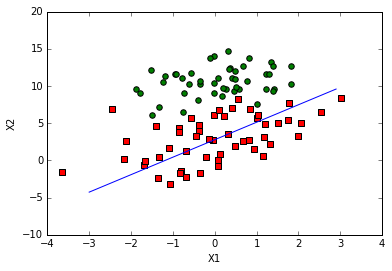

In [47]:
reload(logRegres_test)
dataArr, labelMat = logRegres_test.loadDataSet()
weights = logRegres_test.stocGradAscent0(array(dataArr), labelMat)
print weights
# print len(weights)
# print weights[1]
logRegres_test.plotBestFit_array(weights)

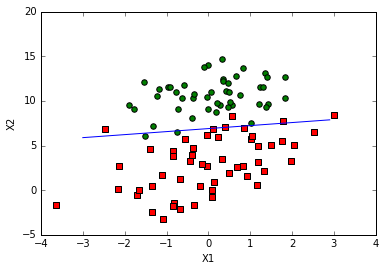

In [52]:
reload(logRegres_test)
dataArr, labelMat = logRegres_test.loadDataSet()
weights = logRegres_test.stocGradAscent1(array(dataArr), labelMat)
logRegres_test.plotBestFit_array(weights)

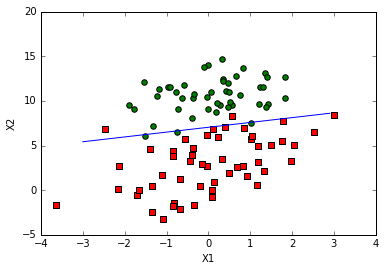

In [53]:
reload(logRegres_test)
dataArr, labelMat = logRegres_test.loadDataSet()
weights = logRegres_test.stocGradAscent1(array(dataArr), labelMat, 500)
logRegres_test.plotBestFit_array(weights)

In [64]:
frTrain = open('horseColicTraining.txt')
frTest = open('horseColicTest.txt')
trainingSet = []
trainingLabels = []
tag = 0
for line in frTrain.readlines():
    currLine = line.strip().split('\t')
    if tag < 2:
        print "currentLine is"
        print currLine
    
    lineArr = []
    # 这个for是把一整行[]里的数字变成了fload
    for i in range(21):
        lineArr.append(float(currLine[i]))
        print currLine[i]
    if tag < 2:
        print "lineArr is "
        print lineArr
    tag += 1


currentLine is
['2.000000', '1.000000', '38.500000', '66.000000', '28.000000', '3.000000', '3.000000', '0.000000', '2.000000', '5.000000', '4.000000', '4.000000', '0.000000', '0.000000', '0.000000', '3.000000', '5.000000', '45.000000', '8.400000', '0.000000', '0.000000', '0.000000']
2.000000
1.000000
38.500000
66.000000
28.000000
3.000000
3.000000
0.000000
2.000000
5.000000
4.000000
4.000000
0.000000
0.000000
0.000000
3.000000
5.000000
45.000000
8.400000
0.000000
0.000000
lineArr is 
[2.0, 1.0, 38.5, 66.0, 28.0, 3.0, 3.0, 0.0, 2.0, 5.0, 4.0, 4.0, 0.0, 0.0, 0.0, 3.0, 5.0, 45.0, 8.4, 0.0, 0.0]
currentLine is
['1.000000', '1.000000', '39.200000', '88.000000', '20.000000', '0.000000', '0.000000', '4.000000', '1.000000', '3.000000', '4.000000', '2.000000', '0.000000', '0.000000', '0.000000', '4.000000', '2.000000', '50.000000', '85.000000', '2.000000', '2.000000', '0.000000']
1.000000
1.000000
39.200000
88.000000
20.000000
0.000000
0.000000
4.000000
1.000000
3.000000
4.000000
2.000000
0.000

In [66]:
reload(logRegres_test)
logRegres_test.multiTest()

the error rate of this test is: 0.358209
the error rate of this test is: 0.388060
the error rate of this test is: 0.298507
the error rate of this test is: 0.358209
the error rate of this test is: 0.417910
the error rate of this test is: 0.343284
the error rate of this test is: 0.358209
the error rate of this test is: 0.253731
the error rate of this test is: 0.358209
the error rate of this test is: 0.373134
after 10 iterations the average error rate is : 0.350746


RuntimeWarning: overflow encountered in exp
出问题的代码是这样的
```
def sigmoid(inX):
    return 1.0/(1+exp(-inX))
```
是 numpy.exp 返回值在 float64 中存储不下，会截取一部分，给的是个warning，不影响最终结果。如果想存储，可以使用 bigfloat 
直接限制小数点后的位数
```
def sigmoid(inX):
    return 1.0 / (1 + round(exp(-inX), 8))
```